In [26]:
import pandas as pd
import datetime as dt

df = pd.read_csv("../../data/Avtice-losses.csv", header = 1, parse_dates = ["Zeitstempel"])
df["Zeitstempel"] = df["Zeitstempel"] - dt.timedelta(minutes=15)
df = df.groupby("Zeitstempel", as_index=False).kWh.mean()
df = df.resample("H", on = "Zeitstempel").sum().reset_index()
data_loss = df

In [27]:
data_loss["Zeitstempel"].duplicated().sum()

0

In [28]:
data_renewable_generation = pd.read_csv("../../data/Forecast-renewable-generation.csv", header = 0, parse_dates = ["datetime"])
data_renewable_generation = data_renewable_generation.groupby("datetime", as_index=False)[[col for col in data_renewable_generation.columns]].mean()
data_renewable_generation

,datetime,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW]
0,2019-01-01 00:00:00,0.0,0.0,21344.8514,4302.6977
1,2019-01-01 01:00:00,0.0,0.0,23052.3310,4596.5916
2,2019-01-01 02:00:00,0.0,0.0,24969.9701,4478.5564
3,2019-01-01 03:00:00,0.0,0.0,27082.9626,4323.3712
4,2019-01-01 04:00:00,0.0,0.0,26890.9717,4231.8283
...,...,...,...,...,...
26296,2021-12-31 19:00:00,0.0,0.0,36997.7200,1108.4000
26297,2021-12-31 20:00:00,0.0,0.0,35666.9300,1077.9700
26298,2021-12-31 21:00:00,0.0,0.0,34383.8800,1048.2800
26299,2021-12-31 22:00:00,0.0,0.0,33075.2500,1078.7800


In [29]:
data_renewable_generation["datetime"].duplicated().sum()

0

In [30]:
data_NTC = pd.read_csv("../../data/NTC.csv", header = 0, parse_dates = ["datetime"])
data_NTC = data_NTC.groupby("datetime", as_index=False)[[col for col in data_NTC.columns]].mean()
data_NTC


,datetime,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH
0,2019-01-01 00:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
1,2019-01-01 01:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2,2019-01-01 02:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
3,2019-01-01 03:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
4,2019-01-01 04:00:00,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
...,...,...,...,...,...,...,...,...,...
26296,2021-12-31 19:00:00,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
26297,2021-12-31 20:00:00,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
26298,2021-12-31 21:00:00,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0,1810.0
26299,2021-12-31 22:00:00,1200.0,4000.0,1400.0,3780.0,1200.0,800.0,3200.0,1810.0


In [31]:
data_NTC["datetime"].duplicated().sum()

0

In [32]:
 data_loss.set_index("Zeitstempel").index.duplicated().sum()

0

In [33]:
data = data_loss.set_index("Zeitstempel")
data = data.join(data_renewable_generation.set_index("datetime"))
data

,kWh,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW]
Zeitstempel,,,,,
2019-01-01 00:00:00,139525.003695,0.0,0.0,21344.8514,4302.6977
2019-01-01 01:00:00,129716.036003,0.0,0.0,23052.3310,4596.5916
2019-01-01 02:00:00,133398.074458,0.0,0.0,24969.9701,4478.5564
2019-01-01 03:00:00,135133.851731,0.0,0.0,27082.9626,4323.3712
2019-01-01 04:00:00,131699.424059,0.0,0.0,26890.9717,4231.8283
...,...,...,...,...,...
2021-12-31 19:00:00,171707.317615,0.0,0.0,36997.7200,1108.4000
2021-12-31 20:00:00,159462.903412,0.0,0.0,35666.9300,1077.9700
2021-12-31 21:00:00,155109.519730,0.0,0.0,34383.8800,1048.2800


In [34]:
data.index.duplicated().sum()

0

/opt/tljh/user/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


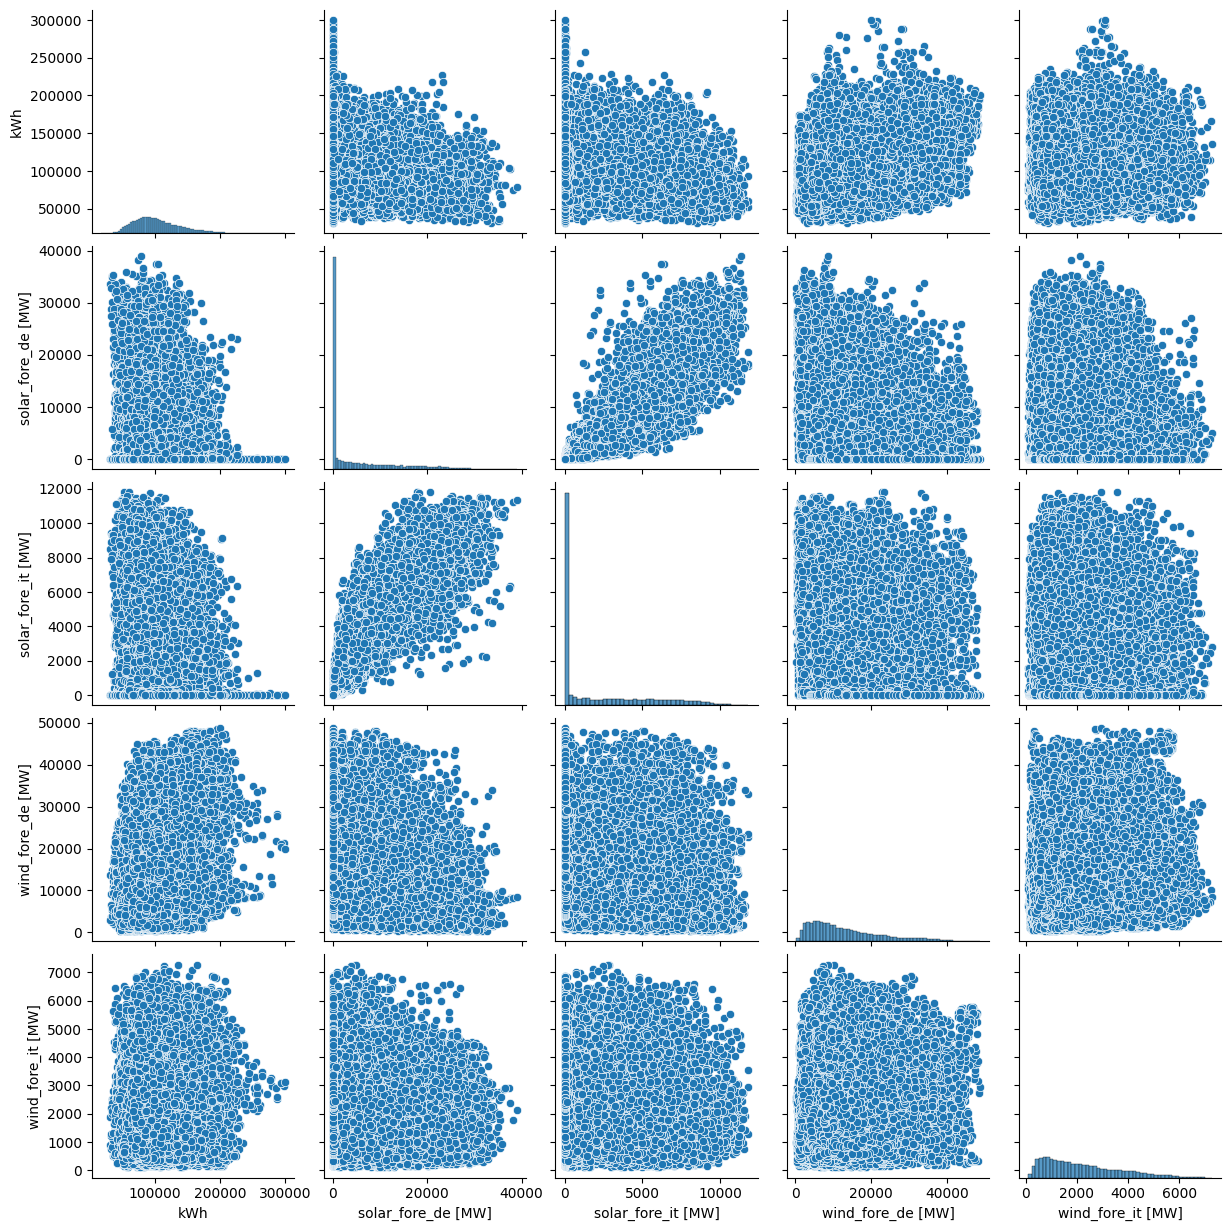

In [10]:
import seaborn

seaborn.pairplot(data)

In [11]:
data_2 = data_loss.set_index("Zeitstempel")
data_2 = data_2.join(data_NTC.set_index("datetime"))

/opt/tljh/user/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


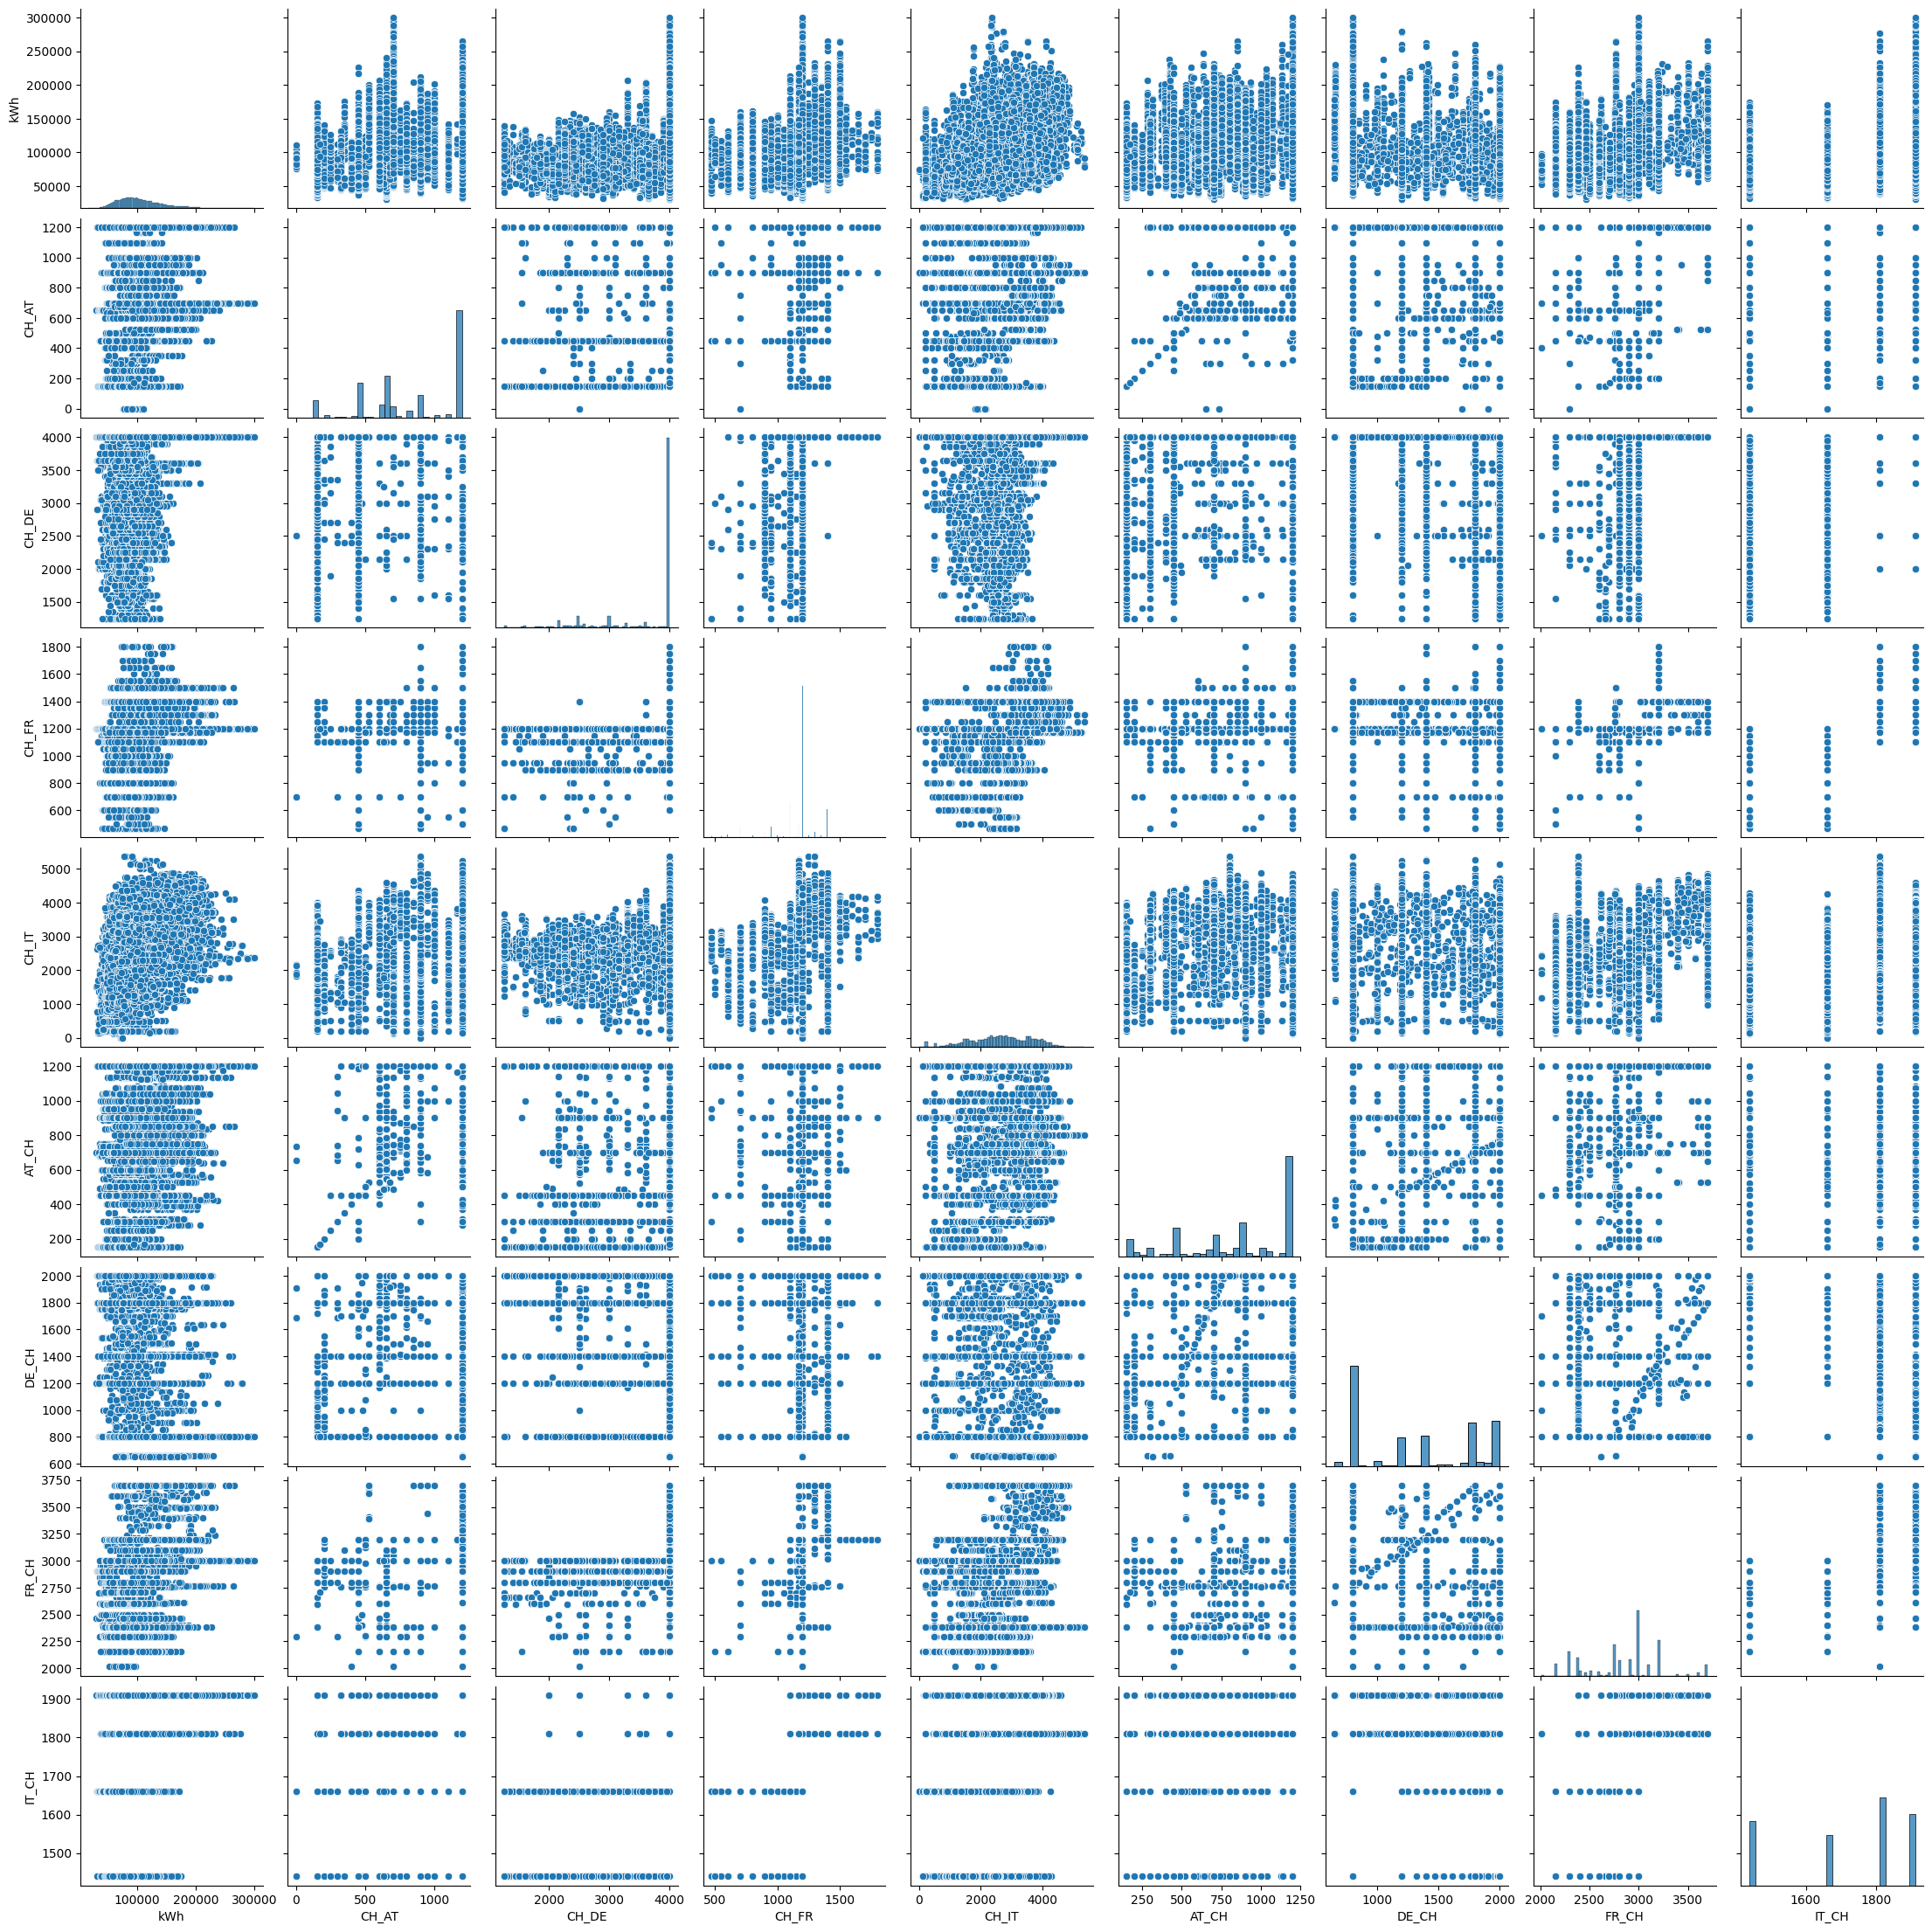

In [12]:
import seaborn

seaborn.pairplot(data_2)

In [44]:
data_temperatures = pd.read_csv("../../data/Forecast-temperature_new.csv", header = 0)

In [45]:
df= data_temperatures
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)


In [46]:
start_time = '2019-01-01 01:00'
end_time = '2021-12-31 17:00'
hourly_range = pd.date_range(start=start_time, end=end_time, freq='H')
df_temperatures_resampled = pd.DataFrame({'datetime': hourly_range})


In [47]:
df_temperatures_resampled = df_temperatures_resampled.merge(df, on="datetime", how='left')
df_temperatures_resampled.interpolate(inplace=True)

In [39]:
df_temperatures_resampled

,datetime,temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it
0,2019-01-01 01:00:00,4.1067,5.972900,7.426800,4.028100
1,2019-01-01 02:00:00,3.7155,5.900717,7.246083,3.811433
2,2019-01-01 03:00:00,3.3243,5.828533,7.065367,3.594767
3,2019-01-01 04:00:00,2.9331,5.756350,6.884650,3.378100
4,2019-01-01 05:00:00,2.5419,5.684167,6.703933,3.161433
...,...,...,...,...,...
26293,2021-12-31 13:00:00,10.8700,12.910000,12.320000,13.110000
26294,2021-12-31 14:00:00,10.8200,13.600000,12.290000,13.310000
26295,2021-12-31 15:00:00,10.6100,13.630000,12.030000,12.880000
26296,2021-12-31 16:00:00,10.0600,12.770000,11.600000,11.760000


In [40]:
data_4 = data_loss.set_index("Zeitstempel")
data_4 = data_4.join(df_temperatures_resampled.set_index("datetime"))

KeyError: "None of ['datetime'] are in the columns"

ValueError: cannot reindex on an axis with duplicate labels

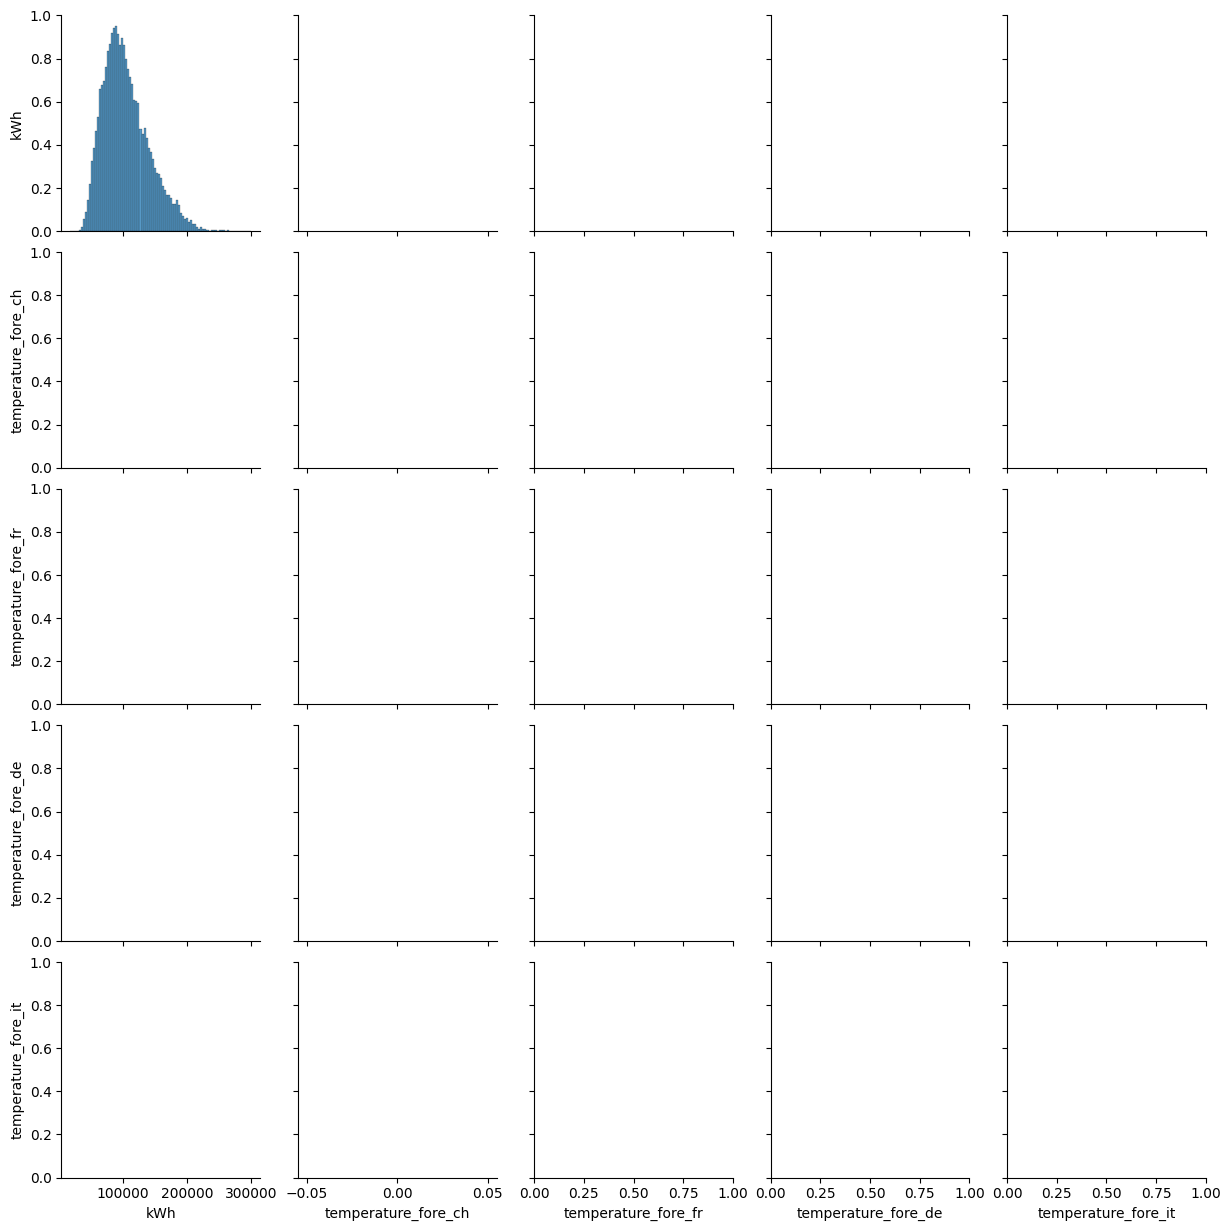

In [41]:
import seaborn

seaborn.pairplot(data_4)

In [ ]:
data_3

## DEFINE WINDOW GENERATOR

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,x_train_df, x_test_df,y_train_df, y_test_df, label_columns=None):
    # Store the raw data.
        self.x_train_df = x_train_df
        self.x_test_df = x_test_df
        self.y_train_df = y_train_df
        self.y_test_df = y_test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
          self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
          self.column_indices = {name: i for i, name in
                               enumerate(x_train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
      inputs = features[:, self.input_slice, :]
      labels = features[:, self.labels_slice, :]
      if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
      inputs.set_shape([None, self.input_width, None])
      labels.set_shape([None, self.label_width, None])

      return inputs, labels

    def plot(self, plot_col, model=None, max_subplots=3):
      inputs, labels = self.example
      plt.figure(figsize=(12, 8))
      plot_col_index = self.column_indices[plot_col]
      max_n = min(max_subplots, len(inputs))
      for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
          label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
          label_col_index = plot_col_index

        if label_col_index is None:
          continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
          predictions = model(inputs)
          plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
          plt.legend()
          plt.xlabel('Time [h]')
    
    def make_dataset(self, data):
      data = np.array(data, dtype=np.float32)
      ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

      ds = ds.map(self.split_window)

      return ds



In [ ]:
X = data_3
y = data_3['kWh']

X
y

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, x_train_df = X_train, y_train_df = y_train, x_test_df = X_test, y_test_df = y_test, 
                     label_columns=['CH_AT'])


In [ ]:
w1.plot(plot_col = 'CH_AT', max_subplots =3)

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(y_train[:w1.total_window_size]),
                           np.array(y_train[100:100+w1.total_window_size]),
                           np.array(y_train[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')
